In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sem import EdwardLinearDynamicSystem, LinearDynamicSystem, KerasLDS
from sem import KerasSRN, EdwardNN

In [2]:
X = [0, 1]
D = 2
lds = EdwardLinearDynamicSystem(D=D)

In [3]:
lds.log_likelihood(X, X, np.eye(2))

-1.8378770664093453

In [4]:
np.random.multivariate_normal(np.zeros(2), np.eye(2)*0.1)

array([-0.36260832, -0.22362947])

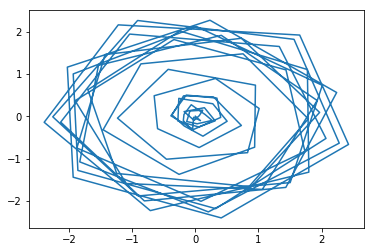

In [5]:
# generate a toy linear dynamical system
np.random.seed(234)  # set this for consistency

n_samples = 100
noise = 0.01

# rotation
theta = 20
b = np.array([0, 0])
W = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# 
X = np.zeros((n_samples, D))
for ii in range(1, n_samples):
    e = np.random.multivariate_normal(np.zeros(2), np.eye(2) * noise)
    X[ii, :] = b + np.matmul(X[ii-1, :], W) + e
plt.plot(X[:, 0], X[:, 1])

In [6]:
#compare the predictions of the two on the training set
lds_keras = KerasLDS(D)
lds_edward = EdwardLinearDynamicSystem(D)
nn_edward = EdwardNN(D)
lds_python = LinearDynamicSystem(D)

for ii in range(n_samples-1):
    lds_keras.update(X[ii, :], X[ii+1, :], estimate=False)
    lds_edward.update(X[ii, :], X[ii+1, :], estimate=False)
    nn_edward.update(X[ii, :], X[ii+1, :], estimate=False)
    lds_python.update(X[ii, :], X[ii+1, :])
nn_edward.update(X[-2, :], X[-1, :], estimate=True)
lds_keras.update(X[-2, :], X[-1, :], estimate=True)
lds_edward.update(X[-2, :], X[-1, :], estimate=True)

keras_predict = np.zeros((n_samples, 2))
python_predict = np.zeros((n_samples, 2))
ed_predict = np.zeros((n_samples, 2))
nn_predict = np.zeros((n_samples, 2))
for ii in range(n_samples-1):
    keras_predict[ii,:] = lds_keras.predict(X[ii, :])
    python_predict[ii, :] = lds_python.predict(X[ii, :])
    ed_predict[ii, :] = lds_edward.predict(X[ii, :]).mean(axis=0)
    nn_predict[ii, :] = nn_edward.predict(X[ii, :])

1000/1000 [100%] ██████████████████████████████ Elapsed: 9s | Loss: 201.449
1000/1000 [100%] ██████████████████████████████ Elapsed: 3s | Loss: -186.136


RuntimeError: Attempted to use a closed Session.

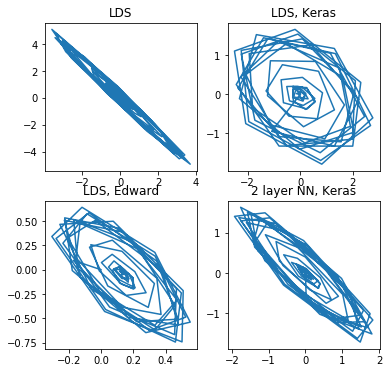

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0][0].plot(python_predict[:,0], python_predict[:,1])
axes[0][0].set_title('LDS')
axes[0][1].plot(keras_predict[:,0], keras_predict[:, 1])
axes[0][1].set_title('LDS, Keras')
axes[1][1].plot(dnn_predict[:,0], dnn_predict[:, 1])
axes[1][1].set_title('2 layer NN, Keras')
axes[1][0].plot(ed_predict[:, 0], ed_predict[:, 1])
axes[1][0].set_title('LDS, Edward')

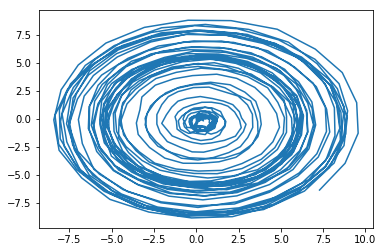

In [9]:
# generate a toy linear dynamical system
np.random.seed(234)  # set this for consistency

n_samples = 1000
noise = 0.01

# rotation
theta = 0.3
b = np.array([0.1, 0.1])
W = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

# 
X = np.zeros((n_samples, D))
for ii in range(1, n_samples):
    e = np.random.multivariate_normal(np.zeros(2), np.eye(2) * noise)
    X[ii, :] = b + np.matmul(X[ii-1, :], W) + e
plt.plot(X[:, 0], X[:, 1])

In [10]:
# compare the predictions of the two on the training set
lds_keras = KerasLDS(D)
lds_edward = EdwardLinearDynamicSystem(D)
dnn_keras = KerasMultiLayerNN(D)
lds_python = LinearDynamicSystem(D)

for ii in range(n_samples-1):
    lds_keras.update(X[ii, :], X[ii+1, :], estimate=False)
    lds_edward.update(X[ii, :], X[ii+1, :], estimate=False)
    dnn_keras.update(X[ii, :], X[ii+1, :], estimate=False)
    lds_python.update(X[ii, :], X[ii+1, :])
dnn_keras.update(X[-2, :], X[-1, :], estimate=True)
lds_keras.update(X[-2, :], X[-1, :], estimate=True)
lds_edward.update(X[-2, :], X[-1, :], estimate=True)

keras_predict = np.zeros((n_samples, 2))
python_predict = np.zeros((n_samples, 2))
ed_predict = np.zeros((n_samples, 2))
dnn_predict = np.zeros((n_samples, 2))
for ii in range(n_samples-1):
    keras_predict[ii,:] = lds_keras.predict(X[ii, :])
    python_predict[ii, :] = lds_python.predict(X[ii, :])
    ed_predict[ii, :] = lds_edward.predict(X[ii, :]).mean(axis=0)
    dnn_predict[ii, :] = dnn_keras.predict(X[ii, :])

1000/1000 [100%] ██████████████████████████████ Elapsed: 9s | Loss: 1879.453


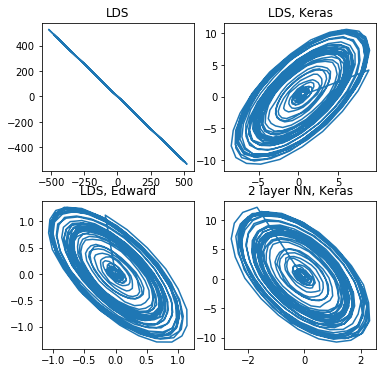

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0][0].plot(python_predict[:,0], python_predict[:,1])
axes[0][0].set_title('LDS')
axes[0][1].plot(keras_predict[:,0], keras_predict[:, 1])
axes[0][1].set_title('LDS, Keras')
axes[1][1].plot(dnn_predict[:,0], dnn_predict[:, 1])
axes[1][1].set_title('2 layer NN, Keras')
axes[1][0].plot(ed_predict[:, 0], ed_predict[:, 1])
axes[1][0].set_title('LDS, Edward')